In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import yfinance

start_date = '2010-01-01'
end_date = '2024-02-01'
ticker = '^GSPC'
data = yfinance.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
from FinancialMachineLearning.features.microstructure import RollModel

roll_model = RollModel(close_prices = data['Close'], window = 10)

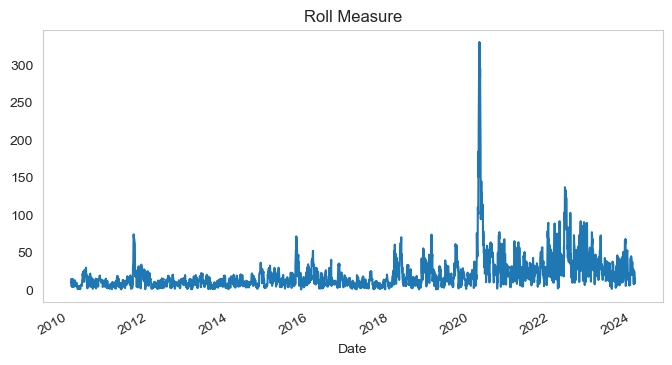

In [11]:
roll_model.roll_measure().plot(
    figsize = (8, 4),
    grid = False,
    title = 'Roll Measure'
)
plt.show()

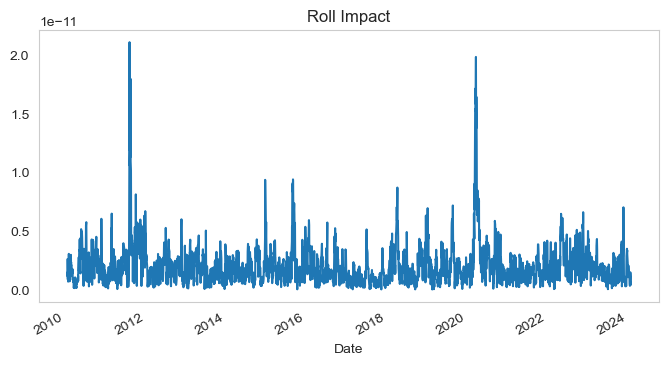

In [10]:
roll_model.roll_impact(dollar_volume = data['Close'] * data['Volume']).plot(
    figsize = (8, 4),
    grid = False,
    title = 'Roll Impact'
)
plt.show()

In [14]:
np.log(data['Close'] / data['Close'].shift(1)).dropna()

Date
2010-01-05    0.003111
2010-01-06    0.000545
2010-01-07    0.003993
2010-01-08    0.002878
2010-01-11    0.001745
                ...   
2024-01-25    0.005247
2024-01-26   -0.000652
2024-01-29    0.007528
2024-01-30   -0.000601
2024-01-31   -0.016237
Name: Close, Length: 3542, dtype: float64

In [21]:
import arch
import warnings
warnings.filterwarnings('ignore')

garch_model = arch.arch_model(
    np.log(data['Close'] / data['Close'].shift(1)).dropna(), 
    vol = 'GARCH', 
    p = 1, q = 3
)
result = garch_model.fit()
print(result.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1.681396563063544e+22
Iteration:      2,   Func. Count:     24,   Neg. LLF: 5339141637639171.0
Iteration:      3,   Func. Count:     41,   Neg. LLF: 1.2746006491823067e+28
Iteration:      4,   Func. Count:     58,   Neg. LLF: 7001201535374715.0
Iteration:      5,   Func. Count:     75,   Neg. LLF: 8.075444041040299e+21
Iteration:      6,   Func. Count:     87,   Neg. LLF: 1.251385015076589e+22
Iteration:      7,   Func. Count:    100,   Neg. LLF: 4000881495154.5786
Iteration:      8,   Func. Count:    117,   Neg. LLF: 1.0476523115538613e+24
Iteration:      9,   Func. Count:    134,   Neg. LLF: 220482943999.77353
Iteration:     10,   Func. Count:    148,   Neg. LLF: 18657123533891.92
Iteration:     11,   Func. Count:    163,   Neg. LLF: 2443.320443829569
Iteration:     12,   Func. Count:    172,   Neg. LLF: 155224425701.9154
Iteration:     13,   Func. Count:    188,   Neg. LLF: -11556.189578577221
Optimization terminated successfully

Text(0.5, 1.0, 'GARCH(1, 3) vs Roll Measure')

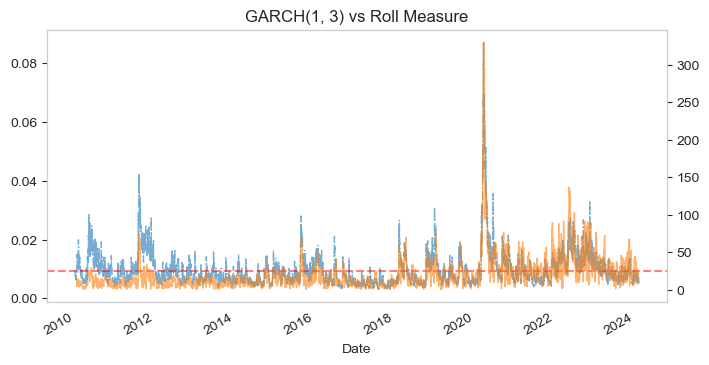

In [35]:
result.conditional_volatility.plot(
    figsize = (8, 4), 
    grid = False,
    ls = '-.',
    lw = 1,
    alpha = 0.6,
)
plt.axhline(result.conditional_volatility.mean(),
            color = 'red', linestyle = '--', alpha = 0.5)
roll_model.roll_measure().plot(
    figsize = (8, 4),
    grid = False,
    secondary_y = True,
    alpha = 0.6,
    lw = 1
)
plt.grid(False)
plt.title('GARCH(1, 3) vs Roll Measure')

In [41]:
result.conditional_volatility['2010-01-20':]

Date
2010-01-20    0.009767
2010-01-21    0.008914
2010-01-22    0.012887
2010-01-25    0.015149
2010-01-26    0.010744
                ...   
2024-01-25    0.006304
2024-01-26    0.006418
2024-01-29    0.005448
2024-01-30    0.006949
2024-01-31    0.005314
Name: cond_vol, Length: 3532, dtype: float64

In [39]:
roll_model.roll_measure()['2010-01-20':]

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
                ...    
2024-01-25    24.472967
2024-01-26    24.648724
2024-01-29    19.898669
2024-01-30     8.169091
2024-01-31    14.994056
Name: Close, Length: 3543, dtype: float64

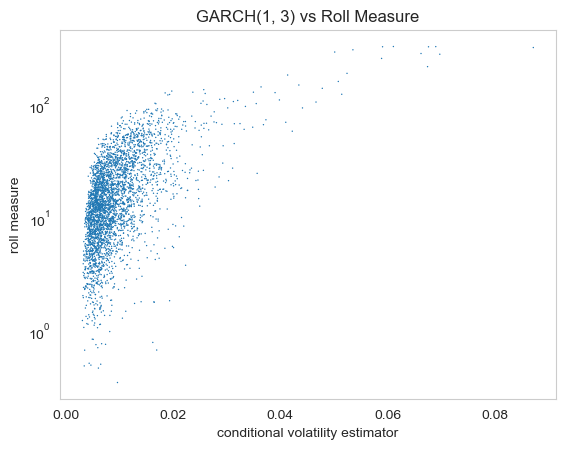

In [49]:
plt.scatter(
    result.conditional_volatility['2010-01-20':],
    roll_model.roll_measure()['2010-01-20':],
    edgecolor = 'none',
    marker = 'o',
    s = 1,
)
plt.grid(False)
plt.xlabel('conditional volatility estimator')
plt.ylabel('roll measure')
plt.yscale('log')
plt.title('GARCH(1, 3) vs Roll Measure')
plt.show()